In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [15]:
data = pd.read_csv('data/titanic2.csv')
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

print(data.shape)  
print(data['Sex'].value_counts())  
print(data.groupby(['Sex', 'Survived']).size())

(891, 8)
Sex
male      577
female    314
Name: count, dtype: int64
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


In [16]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data = pd.get_dummies(data, drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


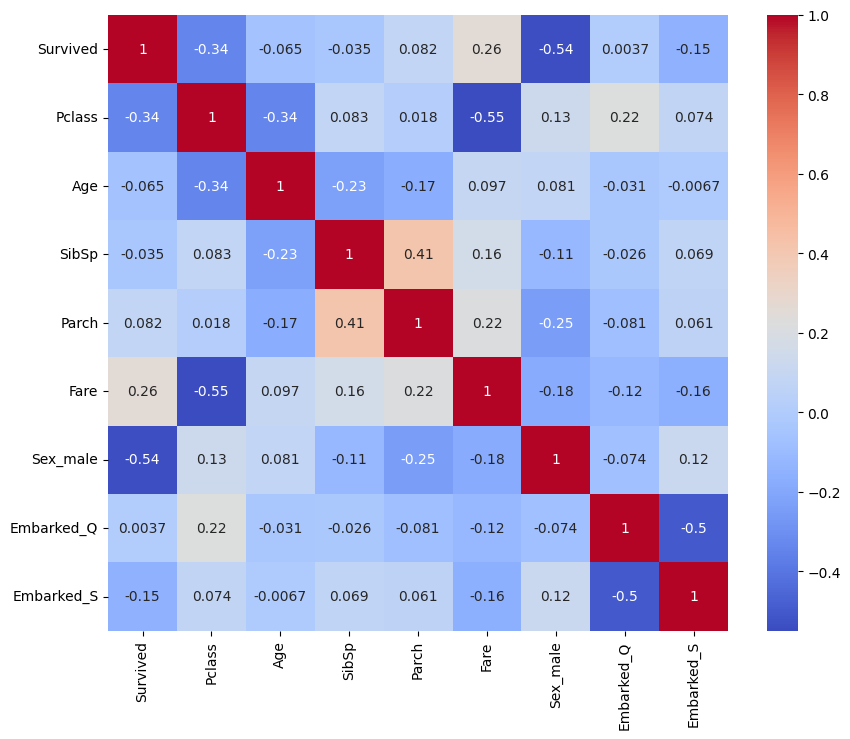

In [17]:
corr = data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [18]:
target = "Survived"
corr_target = corr[target].sort_values(ascending=False)
print("Correlation with target:\n", corr_target)

Correlation with target:
 Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


In [21]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

Precision: 0.7857, F1 Score: 0.7639, Accuracy: 0.8101


In [31]:
from sklearn.metrics import accuracy_score

# Train accuracy
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Test accuracy
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.800561797752809
Test Accuracy: 0.8100558659217877
